In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math
np.random.seed(seed=1)

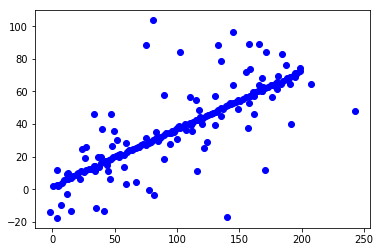

In [5]:
m = 0.35
c = 2
x = np.arange(0,200)
y = m * x + c
data = np.column_stack((x,y))

# add guassian noise
noise = np.random.normal(size=data.shape)
data += 0.5 * noise
data[::2] += 5 * noise[::2]
data[::4] += 20 * noise[::4]
plt.scatter(data[:,0],data[:,1],marker = "o",c="blue")

169 0.34541809441483196 1.9802061209318182
171 0.35374344468490015 1.7538321574131075
172 0.3523491758510703 1.98845133837969
final parameters 0.3523491758510703 1.98845133837969


(0.3523491758510703, 1.98845133837969)

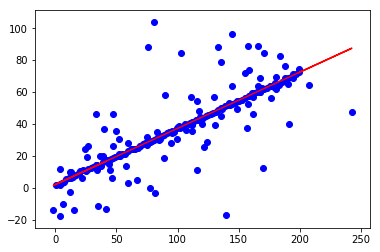

In [16]:
def linear_regression(data):
    X_mean = np.mean(data[:,0])
    Y_mean = np.mean(data[:,1])
    m,c = 0.0,0.0
    num,den = 0,0
    for point in data:
        num = num + (point[0]-X_mean)*(point[1]-Y_mean)
        den = den + (point[0]-X_mean)**2
    m = num / den
    c = Y_mean - m* X_mean
    return m,c
    
def shortest_distance(point,A,B,C):
    # returns perpendicular distance of a point from a straint line
    return (A*point[0] + B*point[1] + C) / (A**2 + B**2)
    
# Pseudo code reference: https://en.wikipedia.org/wiki/Random_sample_consensus    
def ransac(data,s,N):

    n, support, m_best, c_best = 0,0,0,0
    number_of_points = len(data)
    d = 3.84 * s**2
    p = 0.99
    while n < N:
        also_inliers = list()
        index = np.random.randint(number_of_points,size=2)
        inliers = data[index,:]
        m,c = linear_regression(inliers)
        for point in data:
            if point not in inliers:
                dist = shortest_distance(point,m,-1,c)
                if abs(dist) < d:
                    also_inliers.append(point)
        
        also_inliers = np.array(also_inliers)
        also_inliers = np.vstack((also_inliers,inliers))
        inliers_len = len(also_inliers)
        if(inliers_len > support):
            support = inliers_len
            m_best,c_best = linear_regression(np.array(also_inliers))
            print(support,m_best,c_best)
        
        e = 1 - (support)/len(data)
        den = math.log10(1-pow(1-e,s))
        num = math.log10(1-p)
        if(den):
            N = num / den
        n = n + 1
    print("final parameters",m_best,c_best)
    Y = m_best * data[:,0] + c_best
    plt.plot( data[:,0], Y,c="red")
    plt.scatter(data[:,0],data[:,1],marker = "o",c="blue")
    return m_best, c_best


ransac(data,2,50)